/tmp/ipykernel_530972/1991747713.py:42: RuntimeWarning: Mean of empty slice
  k1 = np.nanmean(kappa_1, axis=1)
/tmp/ipykernel_530972/1991747713.py:43: RuntimeWarning: Mean of empty slice
  k2 = np.nanmean(kappa_2, axis=1)
/tmp/ipykernel_530972/1991747713.py:48: FutureWarning: In a future version of xarray decode_timedelta will default to False rather than None. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset("run_hydro/HYDRO_august_13.nc")


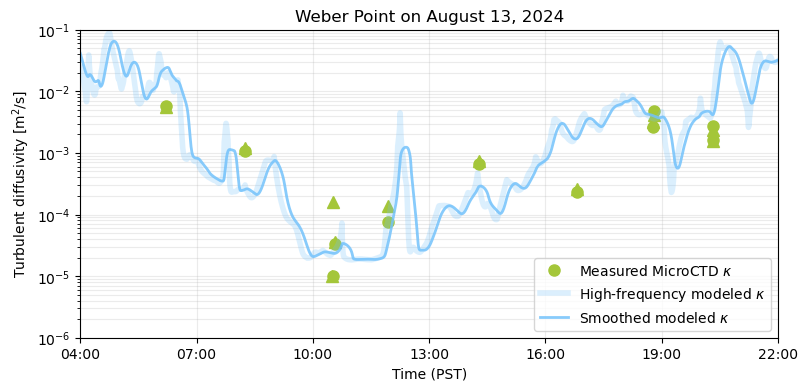

In [26]:
import xarray as xr 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import matplotlib.dates as mdates

start_date = '2024-08-13'
end_date = pd.to_datetime(start_date) + pd.Timedelta(seconds=(10*8640))
dates = pd.date_range(start_date, end_date, freq='10s')
dates = dates[0:-1]
date = "august_13"



fig = plt.figure(figsize=(9,4))
ax = plt.gca()

colors = ["#a4c639", "#73c2fb", "#d1001c"]


date = "aug_13_2024"

##### Weber Point


site = "WP" 
fout = "/pscratch/sd/s/siennaw/stockton_field_data/microctd/%s_eps_%s_Layer=1000_wDiff.nc" % (site, date)

data = xr.open_dataset(fout)
data = data.sortby('time')
data = data.dropna(dim='time', how="all")

# Take surface layer 
surface_data = data.sel(z=slice(1, 0)) 
t = pd.to_datetime(surface_data.time.values)


# print(surface_data)
kappa_1 = surface_data.kappa1.values
kappa_2 = surface_data.kappa2.values

k1 = np.nanmean(kappa_1, axis=1)
k2 = np.nanmean(kappa_2, axis=1)

ax.plot(t, k1, 'o', color=colors[0], markersize=8, label=r"Measured MicroCTD $\kappa$")
ax.plot(t, k2, '^', color=colors[0], markersize=8)

ds = xr.open_dataset("run_hydro/HYDRO_august_13.nc")
kz_ = ds.Kz.sel(z=slice(1, 0)) 
kz_av = kz_.mean(dim="z") # np.nanmean(kz2.values, axis=0)
ax.plot(dates, kz_av, linewidth=4, alpha=0.25, color=colors[1], label=r"High-frequency modeled $\kappa$")
ax.plot(dates, kz_av.rolling(time=100).mean(), '-', linewidth=2, alpha=0.85, color=colors[1], label=r"Smoothed modeled $\kappa$")


ax.set_xlim(pd.to_datetime("August 13, 2024 04:00"), pd.to_datetime("August 13, 2024 22:00"))
# format the dateimte axis with mdates
ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.grid(alpha=0.25, which="both")
ax.set_ylabel("Turbulent diffusivity [m$^2$/s]")
ax.set_xlabel("Time (PST)")
ax.legend()
ax.set_ylim(1e-6, 1e-1)
ax.set_yscale('log')
ax.set_title("Weber Point on August 13, 2024")
plt.show()
fig.savefig("/global/homes/s/siennaw/scratch/siennaw/figures/hydro_validation.png")


In [27]:
for var in ds.data_vars:
    print(var)

U
C
Kz
L
Q2
N_BV2


<>:10: SyntaxWarning: invalid escape sequence '\k'
<>:19: SyntaxWarning: invalid escape sequence '\k'
<>:10: SyntaxWarning: invalid escape sequence '\k'
<>:19: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_530972/3311334998.py:10: SyntaxWarning: invalid escape sequence '\k'
  ax.plot(t, L1, 'o', color=colors[0], markersize=8, label="Measured MicroCTD $\kappa$")
/tmp/ipykernel_530972/3311334998.py:19: SyntaxWarning: invalid escape sequence '\k'
  ax.plot(dates, thorpe, linewidth=4, alpha=0.75, color=colors[1], label="High-frequency modeled $\kappa$")


Data variables:
    U        (time, z) float64 4MB ...
    C        (time, z) float64 4MB ...
    Kz       (time, z) float64 4MB ...
    L        (time, z) float64 4MB 0.5 0.5 0.5 0.5 ... 0.3182 0.31 0.2557 0.1136
    Q2       (time, z) float64 4MB ...
    N_BV2    (time, z) float64 4MB ...


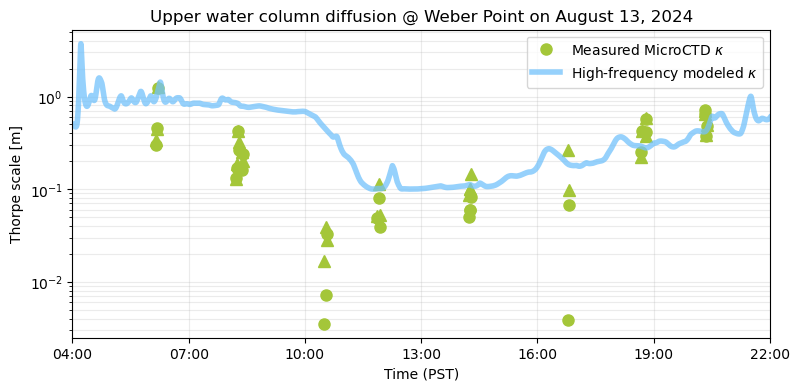

In [29]:

fig = plt.figure(figsize=(9,4))
ax = plt.gca()

# Take surface layer 
t = pd.to_datetime(surface_data.time.values)

L1 = np.nanmean(surface_data.thorpe1, axis=1)
L2 = np.nanmean(surface_data.thorpe2, axis=1)

ax.plot(t, L1, 'o', color=colors[0], markersize=8, label="Measured MicroCTD $\kappa$")
ax.plot(t, L2, '^', color=colors[0], markersize=8)

# ds = xr.open_dataset("output/STRAT_HIGH_RES_0.nc")
# print(surface_data)
print(ds.data_vars)
thorpe = ds.L.mean(dim="z") 


ax.plot(dates, thorpe, linewidth=4, alpha=0.75, color=colors[1], label="High-frequency modeled $\kappa$")



ax.set_xlim(pd.to_datetime("August 13, 2024 04:00"), pd.to_datetime("August 13, 2024 22:00"))
# format the dateimte axis with mdates
ax.xaxis.set_major_locator(mdates.HourLocator(interval=3))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax.grid(alpha=0.25, which="both")
ax.set_ylabel("Thorpe scale [m]")
ax.set_xlabel("Time (PST)")
ax.legend()
# ax.set_ylim(1e-5, 1e-1)
ax.set_yscale('log')
ax.set_title("Upper water column diffusion @ Weber Point on August 13, 2024")
plt.show()



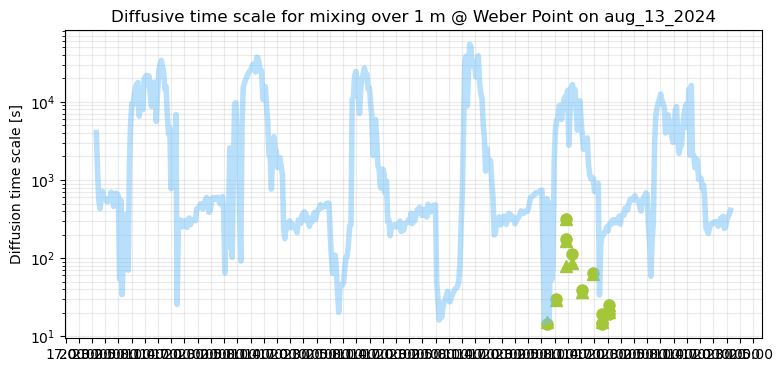

In [25]:
fig2 = plt.figure(figsize=(9,4))
ax2 = plt.gca()
ax2.plot(t, np.sqrt(1/k1), 'o', color=colors[0], markersize=8, label="MicroCTD $T_{\epsilon}$")
ax2.plot(t, np.sqrt(1/k2), '^', color=colors[0], markersize=8, label="MicroCTD $T_{\epsilon}$")
ax2.plot(dates, 1/kz_av, linewidth=4, alpha=0.5, color=colors[1], label="One-dimension modeled $\kappa$")

# ax2.hlines(1/(diatom), t[0], t[-1], color=colors[2], label="1.4e-5 m/s", linestyle="--")
ax2.xaxis.set_major_locator(mdates.HourLocator(interval=3))
ax2.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
ax2.grid(alpha=0.25, which="both")
# ax2.set_xlim(dates[175], dates[220])
ax2.set_yscale('log')
ax2.set_ylabel("Diffusion time scale [s]")
ax2.set_ylabel("Diffusion time scale [s]")
ax2.set_title("Diffusive time scale for mixing over 1 m @ Weber Point on %s" % date)
fig.savefig("aug_27.png")